# Tasks (Winter 2023/24)

***
### Course: HDip in Computing in Data Analytics
### Module:  Machine Learning and Statistics 
### Lecturer: Ian McLoughlin
### Student: Sarah Hastings 
### Student Number: G00235562

***

### Introduction

This notebook contains the tasks for the Machine Learning and Statistics module, which can be viewed in the data folder of this repository, https://github.com/Sarahlouhast/MLS_Project/blob/main/data/2324_winter_mach_stat_tasks.pdf.

### Importing libraries

In [1]:
# Import pandas to allow for data analysis, manipulation
import pandas as pd
# Use Pyplot, part of the Matplotlib library to visualize the diagram/use for visual data/plots etc 
import matplotlib.pyplot as plt
# For working with numerical data, arrays
import numpy as np
# Importing seaborn gives a variety of visualization patterns in addition to matplotlib
import seaborn as sns
# Shuffles
import random
# Statistics.
import scipy.stats as ss
from scipy.stats import chi2_contingency
#Split the dataset into train and test models
from sklearn.model_selection import train_test_split
#Training model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Classification and Logistic regression
from sklearn.linear_model import LogisticRegression
#View accuracy/predictability
from sklearn.metrics import accuracy_score,confusion_matrix
# Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
#Useful for plotting visual relationships between data 
from pandas.plotting import andrews_curves
# T test import
from scipy.stats import ttest_ind
# Import of datasets
from sklearn import datasets

## Task 1 

> Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as `math`. In this task, you should write a function `sqrt(x)` to approximate the square root of a floating point number x without using the power operator or a package.

> Rather, you should use the Newton’s method. Start with an initial guess for the square root called $z_0$. You then repeatedly improve it using the following formula, until the difference be tween some previous guess $z_i$ and the next $z_{i+1}$ is less than some threshold, say 0.01. 

$$ z_{i+1} = z_i − \frac{z_i × z_i −x}{2z_i} $$

In [2]:
# Check Python's value for square root of 3.
3**0.5

1.7320508075688772

### Newton-Raphson method

The Newton-Raphson method which is also known as Newton’s method, is an iterative numerical method used to find the roots of a real-valued function. It is most commonly used for approximation of the roots of the real-valued functions

***

1. The calculation $z^2 - x$ is exactly zero when $z$ is the square root of $x$. It is greater than zero when $z$ is too big. It is less than zero when $z$ is too small. Thus $(z^2-x)^2$ is a good candidate for a cost function.

2. The derivative of the numerator of $z^2 - x$ with respect to $z$ is $2z$. That is the denominator of the fraction in the formula from the question.

***


In [3]:
# The number that we want to calculate the square root of.
x = 3
#Our initial guess for the square root -can be anything.
z = 2.0
# The first approximation
z = z - (((z*z)-x)/(2*z))
z 

1.75

The below shows variations which can be made in the Newton's method.
The first shows the method using a number of iterations, in this case 100 times, for better accuracy, and then calculates and prints the square root.
Whereas as the second iteratively refine the approximation until a specified tolerance is reached, providing a practical and accurate way to compute square roots. The second piece of code is more adaptable as it allows you to control the accuracy of the approximation by adjusting the threshold. 

In [4]:
# Newton's method
def sqrt(x):
    # Inital guess for the square root.
    z = x / 4.0

     # Loop for a fixed number of iterations - 100 in this case.
    for i in range(100):
        # Newton's method for a better approximation
        z = z - (((z*z)-x)/(2*z))
    # z should now be a good approximation for the square root.
    return z

# Example usage:
result = sqrt(3)
print(result)

1.7320508075688774


In [5]:
def sqrt(x, threshold=0.01):
    # Initial guess for the square root.
    z = x / 4.0

    # Loop until the difference between successive guesses is less than the threshold.
    while True:
        # Newton's method for a better approximation.
        next_z = z - (((z*z)-x)/(2*z))

        # Check if the difference is less than the threshold.
        if abs(next_z - z) < threshold:
            break
        
        # Update the guess for the next iteration.
        z = next_z

    # Return the final approximation for the square root.
    return z

# Example usage:
result = sqrt(3)
print(result)


1.7341326020748073


## Task 2

>  Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this
instance. 




![Chi](https://www.gstatic.com/education/formulas2/553212783/en/chi_squared_test.svg)

## Laerd Statistics Chi-Square Test for Independence

https://statistics.laerd.com/spss-tutorials/chi-square-test-for-association-using-spss-statistics.php

***

In [6]:
# Create the contingency table
table = np.array([[43, 57], [56, 45]])

#Perform the chi-squared test  
chi2, p, dof, expected = chi2_contingency(table)

# Print the contingency table
print("Contingency Table:")
print("     | Chocolate | Plain")
print("-----|-----------|------")
print(f"Coffee| {table[0, 0]:^9} | {table[0, 1]:^4}")
print(f"Tea   | {table[1, 0]:^9} | {table[1, 1]:^4}")
print("\n")

# Print the results
print("Chi-squared value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Check for significance (common significance level is 0.05)
if p < 0.05:
    print("\nThere is evidence of an association between drink preference and biscuit preference.")
else:
    print("\nThere is no significant evidence of an association.")

Contingency Table:
     | Chocolate | Plain
-----|-----------|------
Coffee|    43     |  57 
Tea   |    56     |  45 


Chi-squared value: 2.6359100836554257
P-value: 0.10447218120907394
Degrees of freedom: 1
Expected frequencies:
[[49.25373134 50.74626866]
 [49.74626866 51.25373134]]

There is no significant evidence of an association.


## Task 3

> Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.


### What is a t-test

The objective of a test is to compare the means of two related or unrelated sample groups. It is used in hypothesis testing to test the applicability of an assumption to a population of interest. T-tests are only applicable to two data groups. If you want to compare more than two groups, then you have to resort to other tests.  

### T test analysis

In terms of the penguins dataset male penguins tend to have larger body masses and longer flipper lengths than female penguins. 

The below will detail the body mass across sex, species and specifically gentoo penguins and will then perform a t test to show if there is a difference in the body mass of male and female gentoo.

In [7]:
# Load the penguins dataset from seaborn
penguins = sns.load_dataset("penguins")
#penguins.info()
#penguins.columns

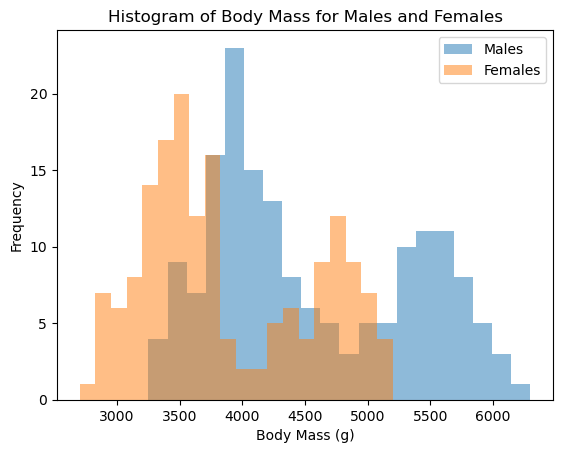

In [8]:
# Histogram of body mass for both sexes.
# Plot histogram for males
# Filter data for males and females
male_data = penguins[penguins['sex'] == 'Male']
female_data = penguins[penguins['sex'] == 'Female']
plt.hist(male_data['body_mass_g'].dropna(), bins=20, alpha=0.5, label='Males')
# Plot histogram for females
plt.hist(female_data['body_mass_g'].dropna(), bins=20, alpha=0.5, label='Females')

# Add labels and title
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.title('Histogram of Body Mass for Males and Females')
plt.legend()

# Show the plot
plt.show()


Mean Mass by species:
species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

Mean Mass by Species and Sex:
species    sex   
Adelie     Female    3368.835616
           Male      4043.493151
Chinstrap  Female    3527.205882
           Male      3938.970588
Gentoo     Female    4679.741379
           Male      5484.836066
Name: body_mass_g, dtype: float64


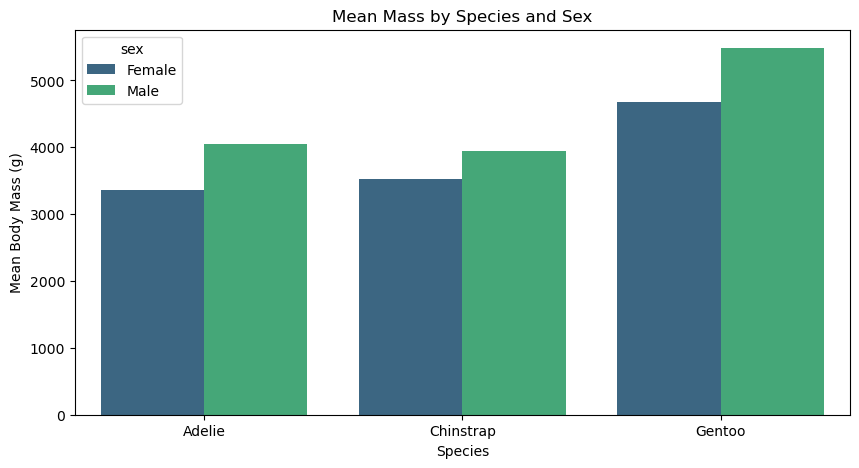

In [9]:
# Group by species, then calculate the mean mass
mean_mass_by_species = penguins.groupby(['species'])['body_mass_g'].mean()
# Display the mean mass for each combination of species
print("\nMean Mass by species:")
print(mean_mass_by_species)

# Group by species and sex, then calculate the mean mass for each combination
mean_mass_by_species_sex = penguins.groupby(['species', 'sex'])['body_mass_g'].mean()

# Display the mean mass for each combination of species and sex
print("\nMean Mass by Species and Sex:")
print(mean_mass_by_species_sex)

# Visualization of the above
# Group by species and sex, then calculate the mean mass for each combination
mean_mass_by_species_sex = penguins.groupby(['species', 'sex'])['body_mass_g'].mean().reset_index()

# Plot mean mass by species and sex
plt.figure(figsize=(10, 5))
sns.barplot(x='species', y='body_mass_g', hue='sex', data=mean_mass_by_species_sex, palette='viridis')
plt.title('Mean Mass by Species and Sex')
plt.xlabel('Species')
plt.ylabel('Mean Body Mass (g)')
plt.show()

Average Body Mass for Males: 4545.684523809524
Average Body Mass for Females: 3862.2727272727275


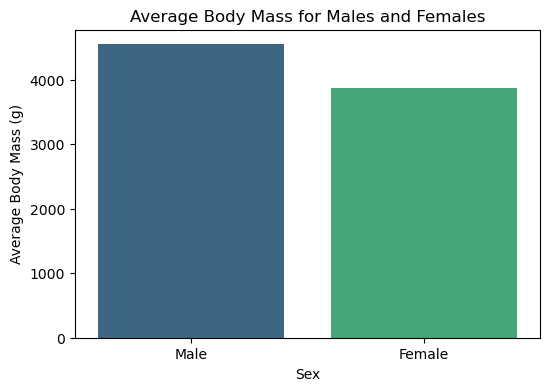

In [10]:
# Filter data for males and females
male_data = penguins[penguins['sex'] == 'Male']
female_data = penguins[penguins['sex'] == 'Female']

# Calculate the mean body mass for males and females
average_mass_male = male_data['body_mass_g'].mean()
average_mass_female = female_data['body_mass_g'].mean()

# Display the results
print("Average Body Mass for Males:", average_mass_male)
print("Average Body Mass for Females:", average_mass_female)

# Create a DataFrame for visualization
average_mass_df = pd.DataFrame({
    'Sex': ['Male', 'Female'],
    'Average Body Mass (g)': [average_mass_male, average_mass_female]
})

# Plot the average body mass for males and females
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Average Body Mass (g)', data=average_mass_df, palette='viridis')
plt.title('Average Body Mass for Males and Females')
plt.show()

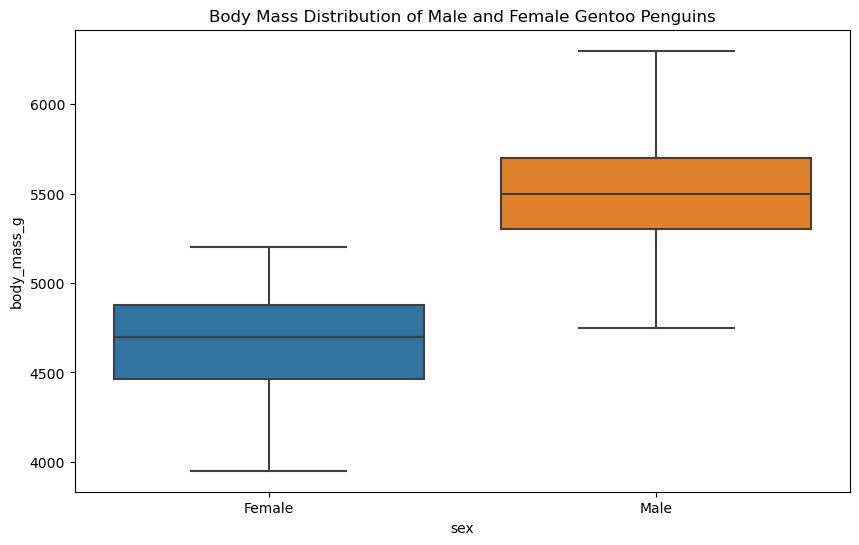

T-statistic: 14.761368414543291
P-value: 1.8677596749117468e-28
There is evidence of a significant difference in the body mass of male and female Gentoo penguins.


In [11]:
# Filter the dataset to include only Gentoo penguins
gentoo_penguins = penguins[penguins["species"] == "Gentoo"]

# Plot a boxplot to visualize the body mass distribution for each gender
plt.figure(figsize=(10, 6))
sns.boxplot(x="sex", y="body_mass_g", data=gentoo_penguins)
plt.title("Body Mass Distribution of Male and Female Gentoo Penguins")
plt.show()

# Perform a t-test to check for a significant difference in body mass between male and female Gentoo penguins
male_mass = gentoo_penguins[gentoo_penguins["sex"] == "Male"]["body_mass_g"]
female_mass = gentoo_penguins[gentoo_penguins["sex"] == "Female"]["body_mass_g"]

# Assuming unequal variances (Welch's t-test)
t_stat, p_value = ttest_ind(male_mass, female_mass, equal_var=False)

# Display the results of the t-test
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Check for significance (common significance level is 0.05)
if p_value < 0.05:
    print("There is evidence of a significant difference in the body mass of male and female Gentoo penguins.")
else:
    print("There is no significant evidence of a difference in body mass.")

## Task 4

> Using the famous iris data set,4 suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.


Iris is a flowering plant, researchers have measured various features and attributes of the different iris flowers species and recorded these digitally. The iris dataset is a collection of 150 samples of iris flowers, each flower has 4 attributes/features – the sepal length, sepal width, petal length and petal width, all features are in centimetres. Based on the features the class, species of the flower can be determined, as either setosa, versicolor or virginica. The dataset contains 50 samples of each species. 

One of the classes, the setosa class, appears to be easily separable from the other two classes. However, the other two clases are not as easily seperable as there is some overlap between these classes. 

I will detail below using various techniques to show distinctions in this class.  

### Load dataset & overview

In [12]:
# Load the dataset into a dataframe
df = pd.read_csv('./data/iris.csv', delimiter=',')
# Get information about the dataset - number of rows, columns, names of columns, data type, this will allow check if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
# Get a description of the data using the describe() method, as the file contains numerical data, this will display statistics including the count, mean, standard deviation, minimum/maximum value, % Percentiles (note percentiles are used in statistics to give you a number that describes the value that a given percent of the values are lower than. how many of the values are less than the given percentile
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
# Summary statistics grouped by species
print(df.groupby('species').describe())

           sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                   

### Summary of the above statistics and results

* Setosa tends to have smaller sepal lengths, widths, and petal lengths compared to the other two species. 

* Versicolor generally falls between Setosa and Virginica in terms of sepal length, sepal width, and petal length. 

* Virginica tends to have larger sepal lengths, sepal widths, and petal lengths compared to Setosa and Versicolor.

### Data visualization

Next I will create a histogram to display the frequency distribution of the variables.
From the below histograms of each variable, the values with longer plots highlight that more values are concentrated there, you can see how each variable is distributed across the dataset, showing the frequency, count, giving you an understanding of the pattern or shape of the distribution across the dataset.

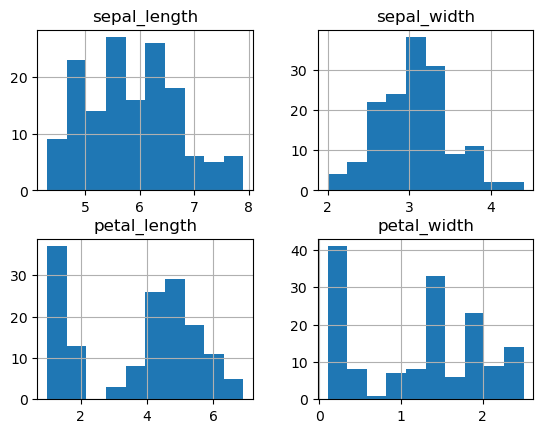

In [15]:
# Plot a histrogram to view value distribution
df.hist()
plt.show()

### Scatter plot
I will create a scatter plot of the variables for petals, sepals to show the relationship between the two variables, from these plots it can be seen that the iris setosa is more separated from the other species.

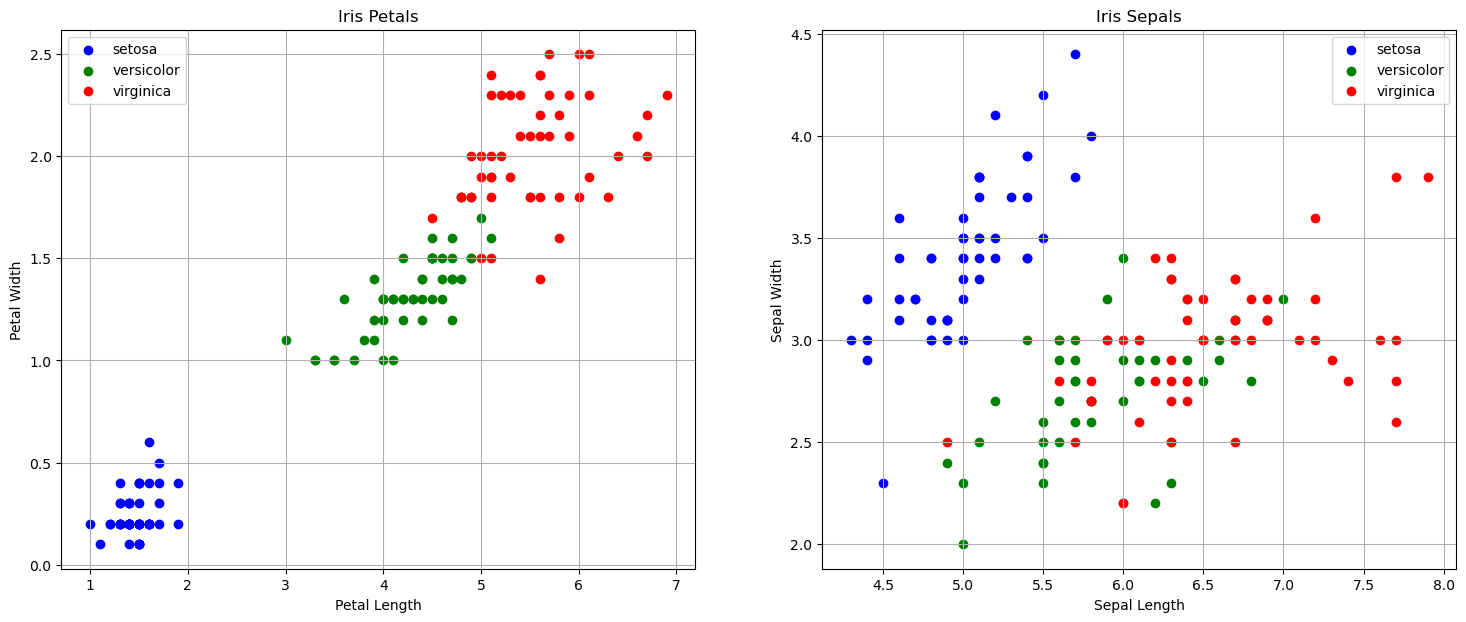

In [16]:
# Scatter plots for petals and sepals
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Plotting petals
for species, color in zip(df['species'].unique(), ['blue', 'green', 'red']):
    subset = df[df['species'] == species]
    axes[0].scatter(subset['petal_length'], subset['petal_width'], label=species, facecolor=color)

axes[0].set_xlabel('Petal Length')
axes[0].set_ylabel('Petal Width')
axes[0].grid(True)
axes[0].set_title('Iris Petals')
axes[0].legend()

# Plotting sepals
for species, color in zip(df['species'].unique(), ['blue', 'green', 'red']):
    subset = df[df['species'] == species]
    axes[1].scatter(subset['sepal_length'], subset['sepal_width'], label=species, facecolor=color)

axes[1].set_xlabel('Sepal Length')
axes[1].set_ylabel('Sepal Width')
axes[1].grid(True)
axes[1].set_title('Iris Sepals')
axes[1].legend()

plt.show()

### Pair plot 
I will create a pairplot using the seaborn and the matplotlib module, this is extremely useful in visualising the 3 species in pairs, how they pair up together, representing the positive and negative correlation between the variables, all at once, in a quick view shot, instead of doing this individually.

For this plot the species will be the variable to map into the differentiating colours. Each of these species is compared with each of the other variables in the dataset, to display a full matrix of the relationships between each variable'

Like the scatterplot result, one clear observation which can be taken from the pairplot is that the setosa (in blue) is separated from both other species in all the features, while separating versicolor from virginica is much harder as they have some overlap.

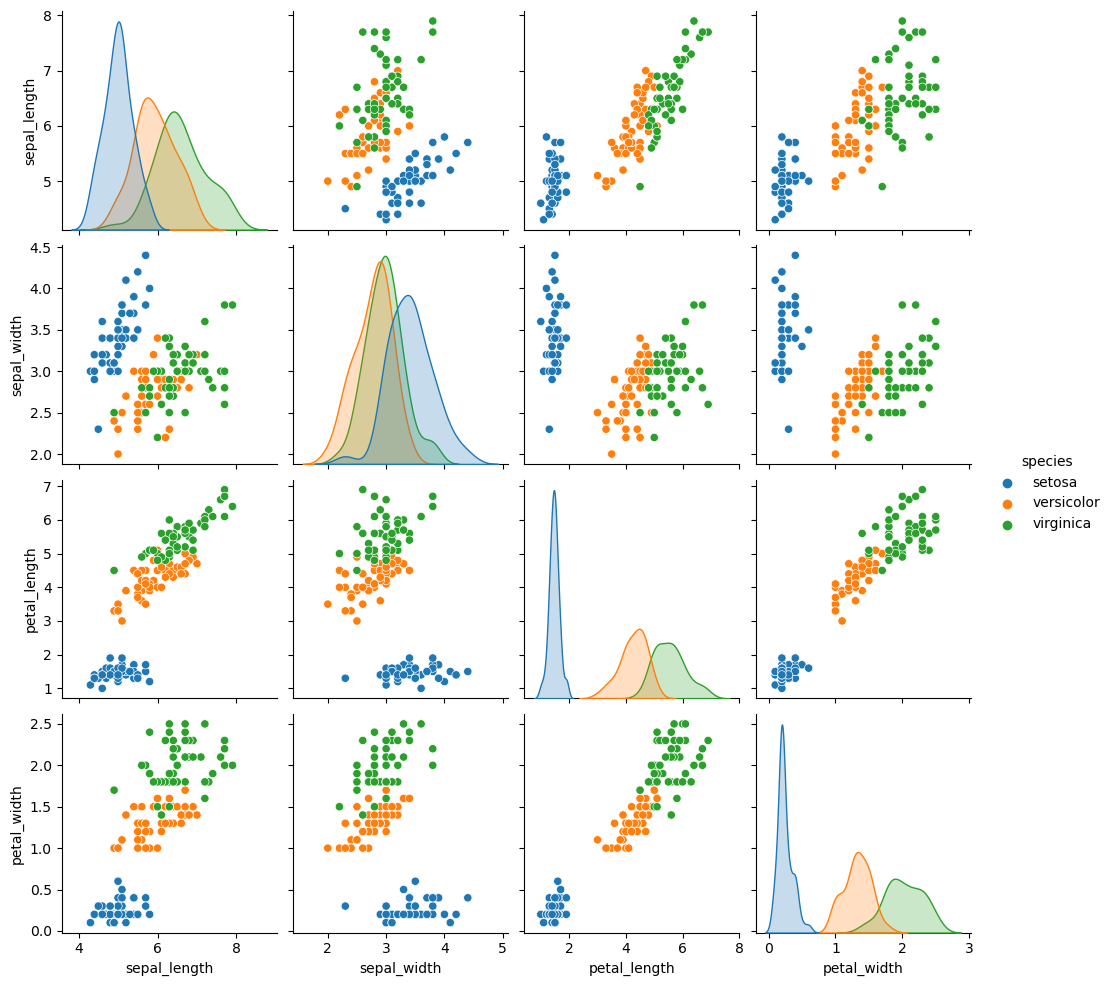

In [17]:
#Create a pairplot - using seaborn and matplotlib module - this is a useful in visualising the 3 species in pairs and see how they pair up together
sns.pairplot(df, hue='species')

plt.show()

### Box plot 
To break it down further from the pairplot I will create a boxplot, also known as whisker plot. This will provide a summary of the distribution of each numeric feature for each species.

Below is an explanation of a boxplot and how to interpret. 

![image](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_boxplots.jpg)

* Median (Q2/50th percentile): The middle value of the data set
* First Quartile (Q1/25th percentile): The middle number between the smallest number (not the “minimum”) and the median of the data set
* Third Quartile (Q3/75th percentile): The middle value between the median and the highest value (not the “maximum”) of the dataset
* Interquartile Range (IQR): 25th to the 75th percentile
* Whiskers (shown in blue)
* Outliers (shown as green circles)
* “Minimum”: Q1 - 1.5*IQR
* “Maximum”: Q3 + 1.5*IQR

From the below boxplots some features (petal length and petal width) have significant differences in their distributions among the three species, mainly for setosa.

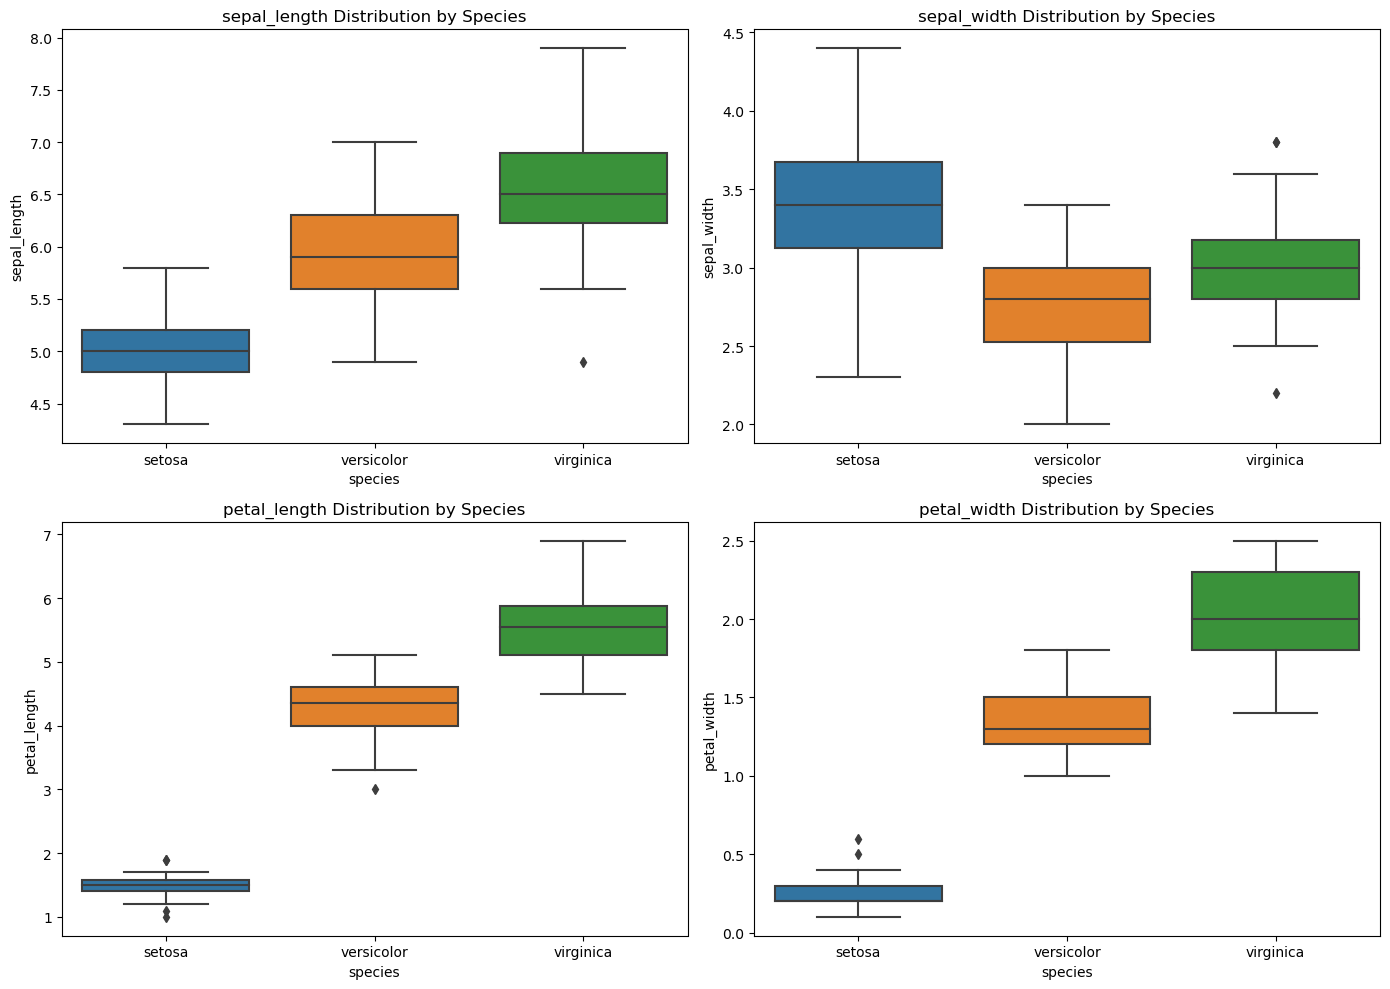

In [18]:
# Plot box plots for all features
plt.figure(figsize=(14, 10))
# Loop over each feature and create a subplot
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'{feature} Distribution by Species')

plt.tight_layout()
plt.show()

### Violin plot
Another usual tool for visualization is a violin plot, this will be a plot of all the input variables (the features) against the output variable which is the species. The violin plot will show density of the length and width of the species. 
The thinner part highlights that there is less density whereas the wider part conveys higher density, a take-away can be that the Iris-Setosa class has a smaller petal length and petal width compared to the other classes. 

From the plot we can notice hight density of the length and width of setosa species, especialy for sepal length, petal length and petal width. Also we can observe that the mean values and the interquartile range for the petal measurements are easily distinguish, althought the values of virginica species are more spreaded.

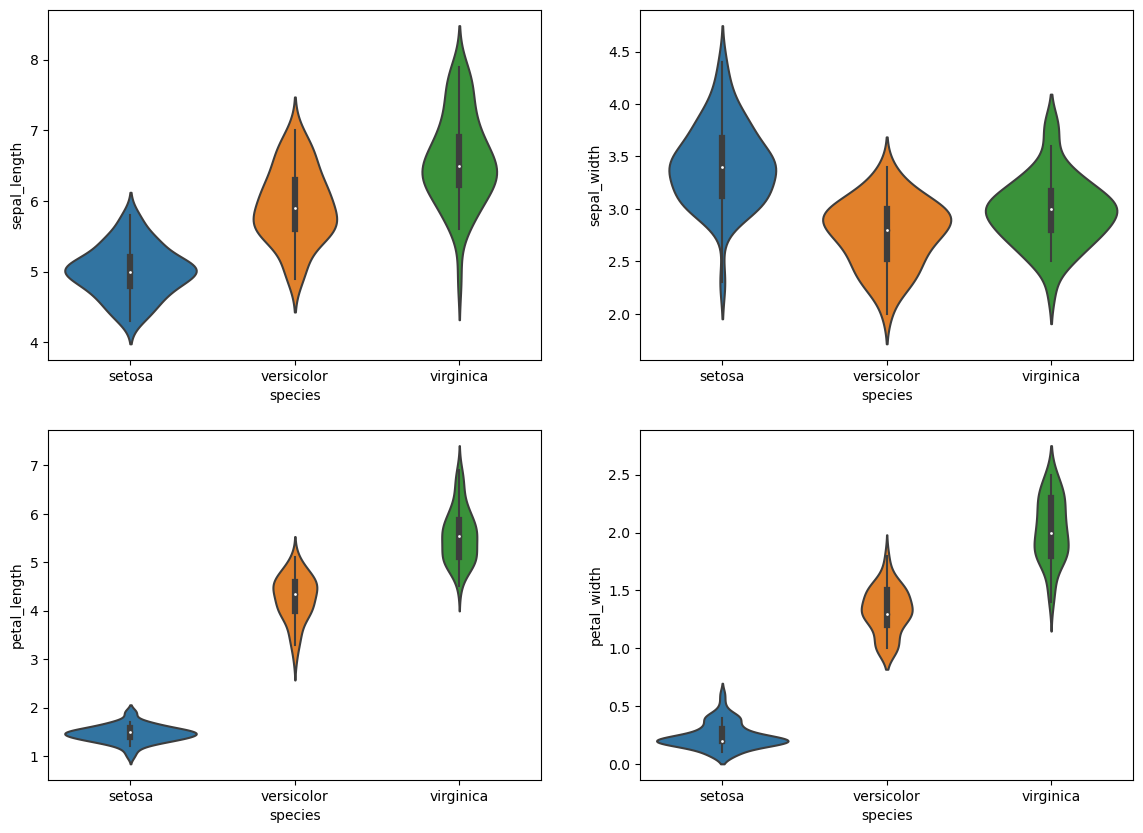

In [19]:
#Create a violin plot - another usual visual using seaborn
#Adjust the length and width of plot
plt.figure(figsize=(14,10))  
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=df)
plt.show() 

### Andrew Curves
Another technique from the pandas library is called Andrews Curves. This will show the relationship between the iris flower features and the species, plotting the curves for each iris flower grouped by species. Where the curves are distinct and separate from the other curves, you can see below in the case of the setosa species this has different feature values compared to versicolor and virginica. Where the curves overlap, you can see that the feature values are similar across the species at these stages.

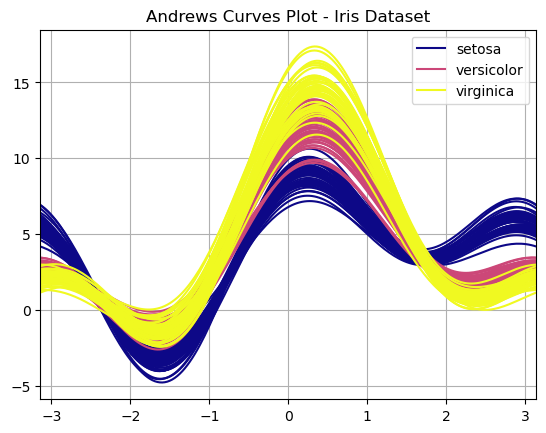

In [20]:
#Andrews Curves - visual using pandas, create the curves plot with the colormap
andrews_curves(df, 'species', colormap='plasma')
plt.title('Andrews Curves Plot - Iris Dataset')
plt.show()

### Correlation matrix
Finally I will use a correlation matrix, exploring the correlations between the different variables, analyzing the strength and direction of the relationship between pairs of variables. I will display this in a heatmap for visualization. Each cell in the table will shows the correlation between the two variables. The value in the matrix will range from -1 to 1, where -1 indicates a negative low correlation, 0 indicates no correlation, and 1 indicates a positive high correlation. It is worth noting that I will create a numeric variable of the data. 
From the heatmap visual, you can see where two variables are close to +1 with a positive correlation, it shows a good relationship, when one variable increases, the other variable is likely to increase as well, if you look at the example petal_length and petal_width (value 0.96), which means that as the petal length increases, the petal width also tends to increase. In the case where the value is close to 0, it means that there is little to no relationship between them, take a look at sepal_length and petal_width have a weak correlation coefficient (0.82), you can take away there may not be a strong relationship between these two variables, adding to the above differences in the species setosa and these features.

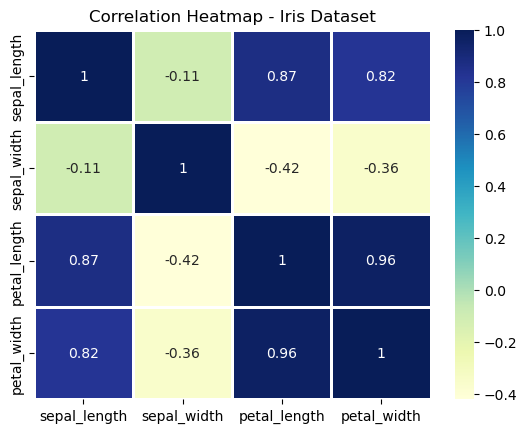

In [21]:
#Correlation matrix & heatmap - further analysis on relationship and patterns, displaying in a heatmap, note the creation of a variable to obtain the numeric data for this function
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
#print(correlation_matrix)
sns.heatmap(correlation_matrix, cmap = "YlGnBu", linecolor = 'white', linewidths = 1, annot = True)
plt.title('Correlation Heatmap - Iris Dataset')
plt.show()

To conclude, it is clear that setosa is seperable from the other species. The summary statisitics and visual inspection of plots shows distinct clusters for setosa, especially in terms of sepal and petal dimensions. 

## Task 5

> Perform Principal Component Analysis on the iris data set, reducing the number of dimensions to two. Explain the purpose
of the analysis and your results


## Step by Step PCA with Iris dataset

https://www.kaggle.com/code/shrutimechlearn/step-by-step-pca-with-iris-dataset
    

PCA, or Principal component analysis, is the main linear algorithm for dimension reduction often used in unsupervised learning. PCA tries to reduce the number of dimension whilst retaining as much variation in the data as possible.

This algorithm identifies and discards features that are less useful to make a valid approximation on a dataset.
It makes complex data simpler by taking a lot of information and finding the most important parts. In the example of the iris dataset, the SepalWidthCm feature seems to be less relevant in explaining the target class compared to the other features. 

The below plots visually represents the data in a reduced-dimension, each point corresponds to an observation (flower) colored by its species (setosa, versicolor, virginica).
The bar plot indicates how much information (variance) is retained by each principal component. In this case, you can see how much each component contributes to explaining the total variance in the data.
Overall, PCA is used for dimensionality reduction, and the visualizations help in understanding the structure and relationships within the dataset in a lower-dimensional space.

Shape before PCA:  (150, 4)
Shape after PCA:  (150, 2)
PCA Explained variance: [2.93808505 0.9201649 ]


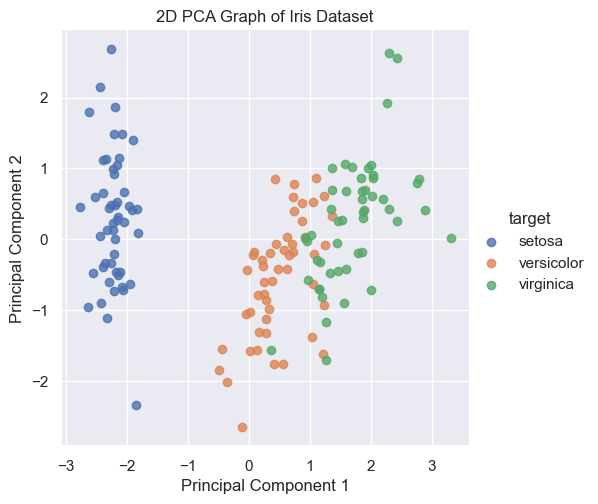

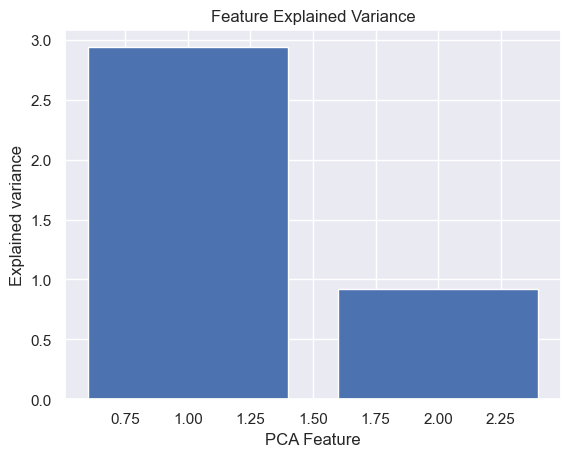

In [22]:
sns.set()
# load features and targets separately
iris = datasets.load_iris()
X = iris.data
y = iris.target
 
# Data Scaling
x_scaled = StandardScaler().fit_transform(X)
 
# Dimention Reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x_scaled)
  
# Show PCA characteristics
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
print('PCA Explained variance:', pca.explained_variance_)
 
# Create PCA DataFrame 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=[
        'Principal Component 1', 
        'Principal Component 2'
        ])
 
# Map target names to targets
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
pca_df.sample(10)
 
# Plot 2D PCA Graph
sns.lmplot(
    x='Principal Component 1', 
    y='Principal Component 2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph of Iris Dataset')
plt.show()
  
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

## References

* https://towardsdatascience.com/principal-component-analysis-fbce2a22c6e0
    
* https://github.com/TalkingDataScience/Principal_Component_Analysis

* https://seaborn.pydata.org/generated/seaborn.hls_palette.html

* https://allysonf.medium.com/exploratory-data-analysis-on-palmer-archipelago-antarctica-penguin-data-41ff3e6efeda

* https://cs533.ekstrandom.net/f20/resources/tutorials/penguinsamples/

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

* https://allysonf.medium.com/exploratory-data-analysis-on-palmer-archipelago-antarctica-penguin-data-41ff3e6efeda

* https://github.com/MSCI-599/unit_3_penguins/blob/main/3_t-tests.Rmd

* https://www.bigabid.com/what-is-pca-and-how-can-i-use-it/

* https://thedatascientist.com/how-to-do-a-t-test-in-python/
 
* https://builtin.com/data-science/boxplot

* https://www.math.umd.edu/~petersd/666/html/iris_pca.html

* https://www.jcchouinard.com/pca-plot-visualization-python/

* https://www.kaggle.com/code/kemalgunay/principal-component-analysis-pca-iris-dataset

* https://thirumalai2024.medium.com/python-program-to-find-square-root-of-the-number-using-newtons-method-937c0e732756

* https://www.geeksforgeeks.org/find-root-of-a-number-using-newtons-method/

* https://towardsdatascience.com/newton-raphson-explained-and-visualised-23f63da21bd5

* https://runestone.academy/ns/books/published/thinkcspy/MoreAboutIteration/NewtonsMethod.html

* https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

* https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

* https://www.youtube.com/watch?v=6kD2OzF2uoU

* https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0090081&type=printable

* https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081

* https://seaborn.pydata.org/tutorial/distributions.html


## End